In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
import mlgrad.regr as regr
import mlgrad.models as models
import mlgrad.inventory as inventory

In [16]:
df = pd.pandas.read_csv("data/gesell.csv", sep=',')
df

,age,score
0,15,95
1,26,71
2,10,83
3,9,91
4,15,102
5,20,87
6,18,93
7,11,100
8,8,104
9,20,94


In [23]:
X = df['age'].values.astype("d")
Y = df['score'].values.astype("d")
X = inventory.zscore(X)
Y = inventory.zscore(Y)

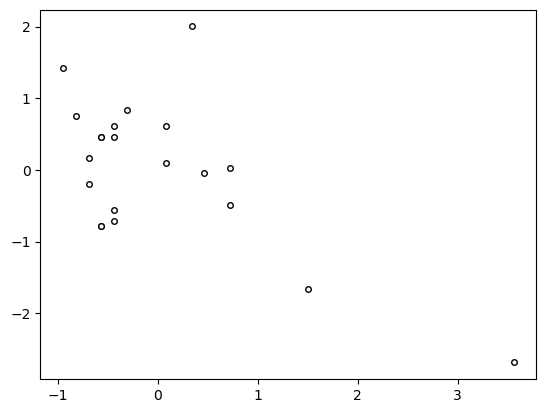

In [24]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.show()

In [27]:
mod_ls = models.LinearModel(1)
regr_ls = regr.regression(X[:,None], Y, mod_ls, h=0.1)
print(np.asarray(mod_ls.param))

[-7.928e-05 -6.403e-01]


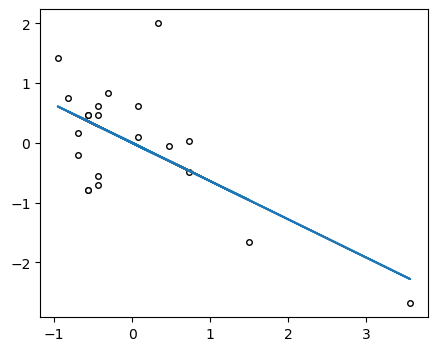

In [28]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]))
plt.show()

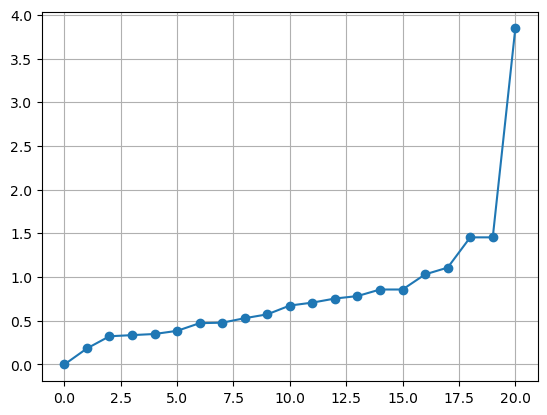

In [29]:
E = abs(mod_ls.evaluate(X[:,None]) - Y)
Z = inventory.modified_zscore(E)
plt.plot(sorted(abs(Z)), marker='o')
plt.grid(1)
plt.show()

In [30]:
X1 = X[abs(Z) < 3.5]
Y1 = Y[abs(Z) < 3.5]

In [32]:
mod_ls1 = models.LinearModel(1)
regr_ls1 = regr.regression(X1[:,None], Y1, mod_ls1, h=0.1)
print(np.asarray(mod_ls1.param))

[-0.111 -0.678]


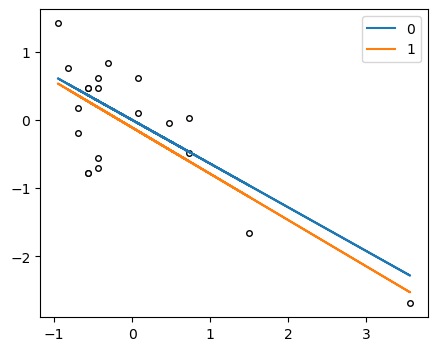

In [33]:
plt.figure(figsize=(5,4))
plt.scatter(X1, Y1, s=16, c='w', edgecolors='k')
plt.plot(X1, mod_ls.evaluate(X1[:,None]), label='0')
plt.plot(X1, mod_ls1.evaluate(X1[:,None]), label='1')
plt.legend()
plt.show()

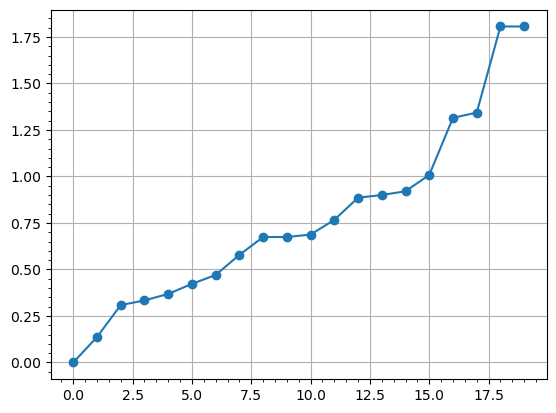

In [34]:
E1 = abs(mod_ls1.evaluate(X1[:,None]) - Y1)
Z1 = inventory.modified_zscore(E1)
plt.plot(sorted(abs(Z1)), marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()

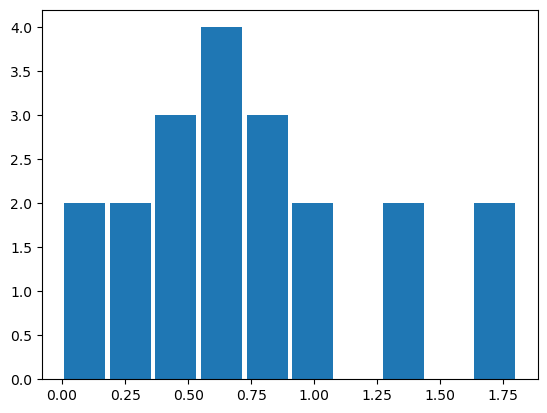

In [35]:
plt.hist(abs(Z1), bins=10, rwidth=0.9)
plt.show()